# DRAGON CURVE

##  1. Opis fraktala

Krzywa zwana *Dragon Curve* (znana także jako *Heighway dragon* lub *paperfolding dragon*) jest klasycznym przykładem fraktala samopodobnego, który można wygenerować w prosty, iteracyjny sposób. 
Po raz pierwszy została opisana w kontekście składania papieru przez Johna Heighwaya, Bruce’a Martina i Williama Hartera (Heighway, Martin, Harter, 1967).

W tej sekcji przedstawiono równoważne opisy konstrukcji oraz omówiono podstawowe własności geometryczne, istotne przy dalszych modyfikacjach.


### Generacja symboliczna (L-system)

Dragon Curve można opisać za pomocą prostego układu produkcji (L-systemu):

$$
\text{Aksjomat: } F
$$

$$
\text{Reguły: }
\begin{cases}
F \to F + G, \\\\
G \to F - G
\end{cases}
$$

gdzie symbole `F` i `G` oznaczają „idź do przodu (dodaj odcinek)”, a symbole `+` i `-` oznaczają obrót o kąt 
$\pi/2$ odpowiednio w prawo i w lewo.  
Iteracyjne podstawianie tych reguł generuje ciąg znaków, który po interpretacji jako łamana daje przybliżenia krzywej.

Formalizm L-systemów jest szerzej omawiany w klasycznych opracowaniach dotyczących fraktali i systemów rekurencyjnych (Peitgen, Jürgens, Saupe, 1992).


### Interpretacja w płaszczyźnie zespolonej

Alternatywny sposób konstrukcji polega na traktowaniu kolejnych węzłów łamanej jako liczb zespolonych.

Niech:
$$
z_0 = 0, \quad r_0 = 1
$$

oznaczają bieżący punkt i wektor kierunku (długość jednego odcinka).  
Interpretacja kolejnych symboli przebiega następująco:

1. **F** lub **G**: zapisz bieżący punkt `z` jako węzeł, następnie wykonaj przesunięcie $z \leftarrow z + r$  
2. **+**: $r \leftarrow r \, e^{i\pi/2}$ (obrót o $+\pi/2$)  
3. **−**: $r \leftarrow r \, e^{-i\pi/2}$ (obrót o $-\pi/2$)

Ten opis jest naturalnym punktem wyjścia do wprowadzenia modyfikacji kąta obrotu, np. na wartość zespoloną (α-Dragon).


### Własności geometryczne

Krzywa Dragon ma kilka charakterystycznych cech:

- **Samopodobieństwo** – krzywa jest fraktalem samopodobnym, tzn. można ją złożyć z dwóch mniejszych kopii, odpowiednio przeskalowanych i obróconych.  
- **Wymiar Hausdorffa** – dla klasycznego Dragon Curve wymiar wynosi 2, ponieważ spełnia równanie:
  
  $$
  2 \cdot \left(\frac{1}{\sqrt{2}}\right)^d = 1 \quad \Rightarrow \quad d = 2
  $$
  
- **Brzeg i wypełnienie** – przybliżenia są łamaną, ale w granicy powstaje figura złożona o zębatym brzegu; krzywa lokalnie „wypełnia” płaszczyznę.  
- **Sekwencja składania papieru** – ciąg obrotów (prawo/lewo) odpowiada tzw. *paperfolding sequence*, znanej z teorii automatów i zadań kombinatorycznych.


### Motywacja do uogólnień

Powyższe opisy (L-system, interpretacja zespolona, IFS) dają naturalne miejsca do wprowadzenia modyfikacji:

1. Zmiana kąta obrotu $\pi/2 \mapsto \alpha$ (α-Dragon) wpływa na topologię i kształt krzywej.  
2. Uczynienie kąta zależnym od iteracji $\alpha \mapsto f(n)$ (f-Dragon) pozwala tworzyć bardziej złożone, nieliniowe struktury, np. z efektami zanikającego lub rosnącego skalowania.


## 2. Implementacja

Generacja fraktala przebiega w dwóch krokach.

W pierwszym kroku iteracyjnie generowany jest ciąg znaków według następujących zasad:

### Krok 1 — Generacja ciągu symboli

1. **Generacja 0:**  
   $F$

2. **Aby otrzymać kolejną generację**, zastępuj symbole *F* i *G* w poprzednim ciągu zgodnie z regułami:

   - $F \rightarrow F + G$  
   - $G \rightarrow F - G$

Po każdej iteracji długość ciągu rośnie dwukrotnie, a struktura łamanej staje się coraz bardziej złożona.


### Krok 2 — Interpretacja ciągu symboli

W kolejnym kroku wygenerowany ciąg znaków interpretowany jest jako kolejne fragmenty łamanej.  
Zasady są następujące:

1. **F / G:** dodaj odcinek o stałej długości w obecnie wybranym kierunku,  
2. **+ :** obrót o $90^{\circ}$ w prawo,  
3. **− :** obrót o $90^{\circ}$ w lewo.

Dzięki takiemu zapisowi można w prosty sposób przełożyć ciąg symboli na ścieżkę krzywej na płaszczyźnie.


### Reprezentacja w płaszczyźnie zespolonej

Krok drugi można zdefiniować również w sposób algebraiczny, reprezentując kolejne „węzły” łamanej jako liczby zespolone.

Niech:
$$
z \leftarrow 0, \quad r \leftarrow 1
$$

Ciąg symboli wygenerowany w kroku pierwszym interpretujemy w następujący sposób:

1. **F / G:** dodaj do listy węzłów łamanej bieżącą wartość $z$,  
   następnie wykonaj $z \leftarrow z + r$  

2. **+ :** $r \leftarrow r \, e^{i \frac{\pi}{2}}$  

3. **− :** $r \leftarrow r \, e^{-i \frac{\pi}{2}}$


### Interpretacja geometryczna

Wygenerowaną listę węzłów interpretujemy jako punkty na płaszczyźnie:

- część rzeczywista liczby zespolonej $z$ → współrzędna **x**,  
- część urojona liczby zespolonej $z$ → współrzędna **y**.

Ostatecznie, po połączeniu punktów w kolejności generacji, otrzymujemy wizualizację krzywej Dragon Curve.


In [2]:
from typing import Callable
import numpy as np
from dragon_curve import dragon_curve
from plot_curve import plot_curve

#### Przykład po 5, 10 i 15 iteracjach

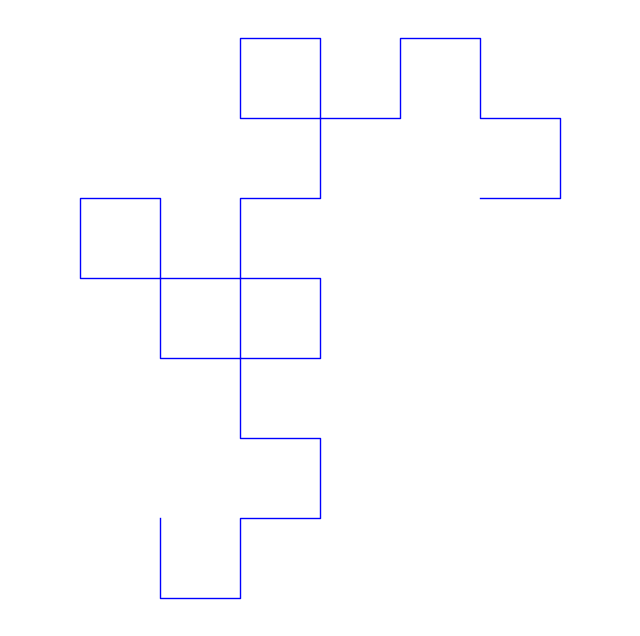

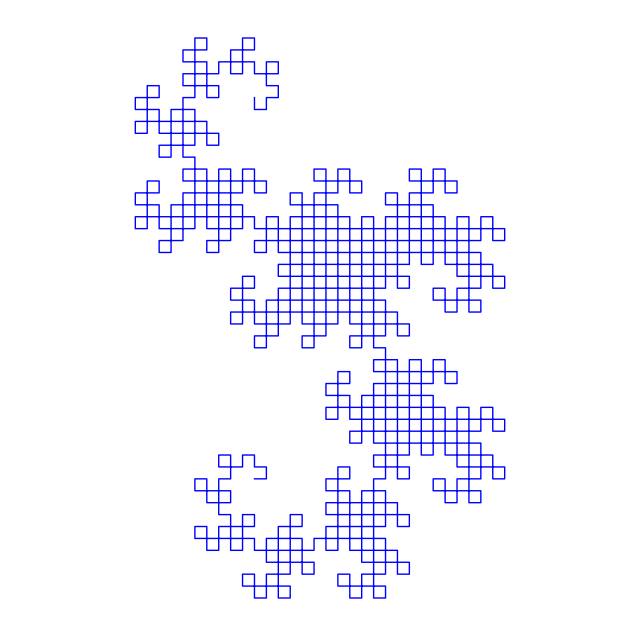

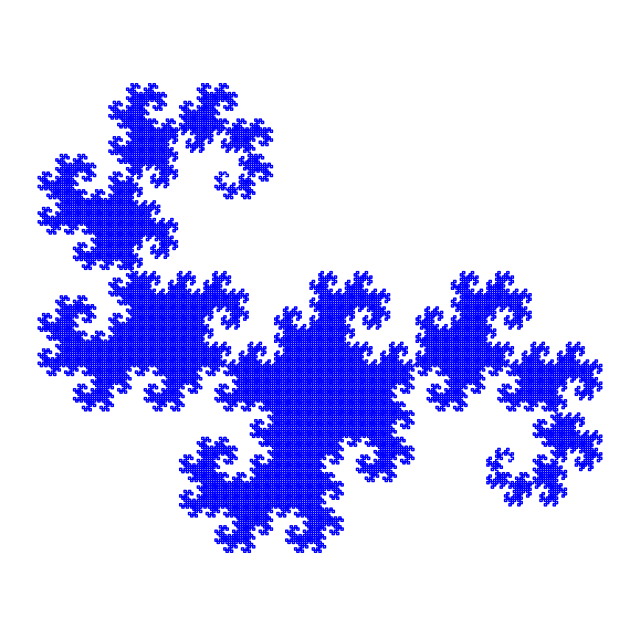

In [2]:
levels = [5, 10, 15]
for level in levels:
    points = dragon_curve(level)
    plot_curve(points)


## 3. Modyfikacje

### α-Dragon Curve

Drugi wariant algorytmu generacji fraktala pozwala na jego łatwą modyfikację. Stałą $\frac{\pi}{2}$, wykorzystywaną do "obrotu" $r$, możemy zastąpić parametrem $\alpha$. W przypadku liczb rzeczywistych, ten parametr odpowiada kątowi obrotu w każdym kroku. Natomiast jeśli $\alpha$ będzie liczbą zespoloną, kolejne odcinki łamanej będą także wykładniczo wydłużać się lub maleć (ponieważ $\mathrm{Re}(i \alpha) \neq 0$).


#### Przykłady

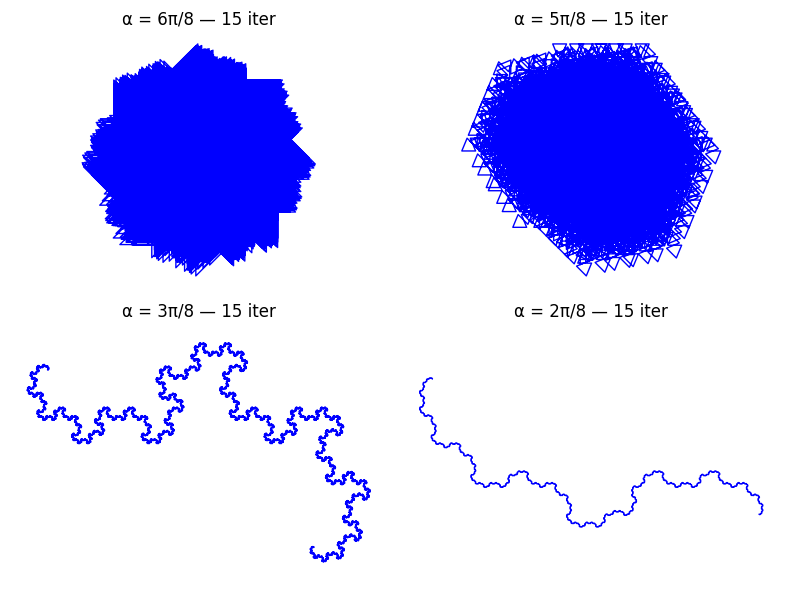

In [3]:
# α-Dragon Curve — 15 iteracji dla kilku wartości α (2x2 subplot)
import matplotlib.pyplot as plt
from dragon_curve import dragon_curve_with_angle_fn

alphas = [6 * np.pi / 8, 5 * np.pi / 8, 3 * np.pi / 8, 2 * np.pi / 8]
labels = ['6π/8', '5π/8', '3π/8', '2π/8']

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.ravel()

for ax, alpha, lbl in zip(axes, alphas, labels):
    # angle function that returns the constant alpha for any turn iteration
    pts = dragon_curve_with_angle_fn(15, lambda i, a=alpha: a)
    plot_curve(pts, axes=ax)
    ax.set_title(f'α = {lbl} — 15 iter')

plt.tight_layout()
plt.show()


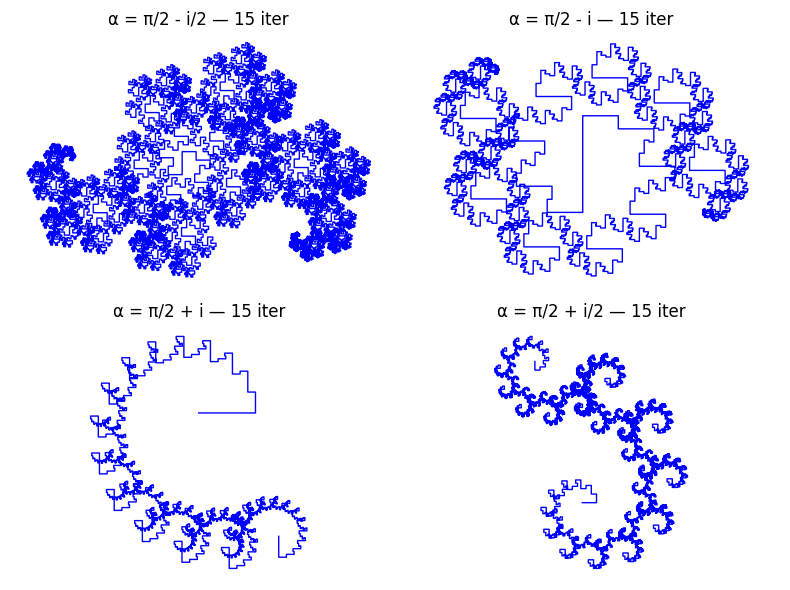

In [5]:
# α-Dragon Curve (zespolone α) — 15 iteracji dla kilku wartości α (2x2 subplot)
alphas = [np.pi/2 - 1j/2, np.pi/2 - 1j, np.pi/2 + 1j, np.pi/2 + 1j/2]
labels = ['π/2 - i/2', 'π/2 - i', 'π/2 + i', 'π/2 + i/2']

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.ravel()

for ax, alpha, lbl in zip(axes, alphas, labels):
    # angle function that returns the complex alpha for any turn iteration
    pts = dragon_curve_with_angle_fn(15, lambda i, a=alpha: a)
    plot_curve(pts, axes=ax)
    ax.set_title(f'α = {lbl} — 15 iter')

plt.tight_layout()
plt.show()

### f-Dragon Curve

Naturalną dalszą parametryzację algorytmu jest zmienna wartość $\alpha$ w kolejnych iteracjach.  
Definiujemy funkcję $f: \mathbb{N} \rightarrow \mathbb{C}$, która dla każdej iteracji $n$ zwraca wartość $\alpha_n = f(n)$ używaną w tej iteracji.

#### Przykłady

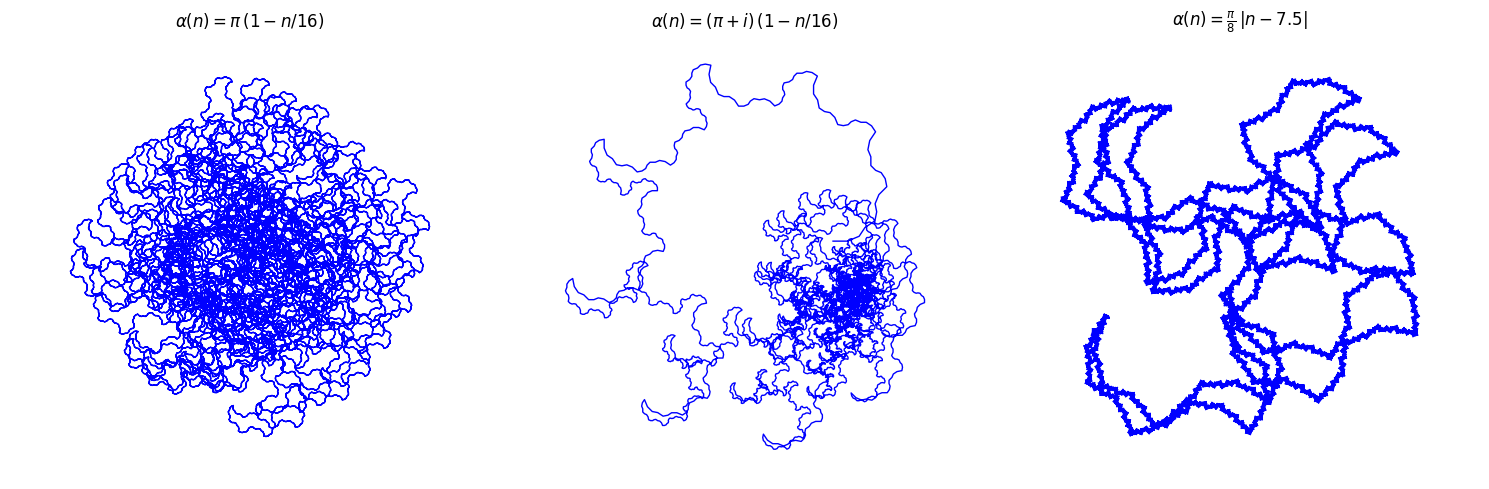

In [6]:
# Definicje funkcji α(n)
def alpha1(n):
    # α(n) = π * (1 - n/16)
    return np.pi * (1 - n / 16)

def alpha2(n):
    # α(n) = (π + i) * (1 - n/16)
    return (np.pi + 1j) * (1 - n / 16)

def alpha3(n):
    # α(n) = (π/8) * |n - 7.5|
    return (np.pi / 8) * abs(n - 7.5)

# Parametry
iterations = 15
funcs = [alpha1, alpha2, alpha3]
labels = [
    r'$\alpha(n)=\pi\,(1 - n/16)$',
    r'$\alpha(n)=(\pi+i)\,(1 - n/16)$',
    r'$\alpha(n)=\frac{\pi}{8}\,|n-7.5|$'
]

# Rysowanie: 1x3 subploty
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, f, lbl in zip(axes, funcs, labels):
    pts = dragon_curve_with_angle_fn(iterations, f)
    plot_curve(pts, axes=ax)
    ax.set_title(lbl)

plt.tight_layout()
plt.show()

## Podsumowanie

W pracy przedstawiono klasyczny fraktal *Dragon Curve* oraz jego modyfikacje umożliwiające eksperymenty z parametrem obrotu $\alpha$. Przeanalizowano dwie główne formy uogólnienia:

- **$\alpha$-Dragon:** stały kąt obrotu $\alpha$ pozwalał badać wpływ zmiany kąta na geometrię i topologię krzywej. Wykresy dla wartości rzeczywistych i zespolonych pokazały, że dodatnia część zespolona prowadzi do wykładniczego wydłużania się odcinków, natomiast ujemna do ich skracania, co wpływa na skalowanie i lokalne wypełnienie obszaru.

- **f-Dragon:** zmienna funkcja $\alpha_n = f(n)$ umożliwia wprowadzanie bardziej złożonych efektów, takich jak malejący lub rosnący kąt, oscylacje, czy losowe perturbacje. Wyniki pokazały, że nawet niewielkie zmiany wartości $\alpha$ w kolejnych iteracjach mogą znacząco zmienić topologię krzywej, powodując powstawanie nowych struktur i asymetrii.

### Główne obserwacje:
1. Fraktal zachowuje pewne cechy samopodobieństwa, nawet przy zmiennym kącie, choć globalna orientacja i gęstość łamanej ulegają zmianie.
2. Część zespolona kąta $\alpha$ wprowadza efekt skalowania, co może być użyteczne do generowania fraktali o niestandardowych proporcjach.
3. Zależność $\alpha$ od numeru iteracji lub pozycji w łamanej (f-Dragon) pozwala modelować różnorodne, dynamiczne wzory oraz testować odporność struktury na losowe zaburzenia.

Podsumowując, zaprezentowane modyfikacje $\alpha$-Dragon i f-Dragon umożliwiają zarówno naukową analizę wpływu parametrów na geometrię fraktali, jak i kreatywne eksperymenty wizualne, rozszerzając klasyczny Dragon Curve o bogatsze i bardziej złożone struktury.


### Źródła

- Heighway, J., Martin, B., Harter, W. (1967). *The Heighway Dragon: A Fractal Curve from Folding Paper*. *Scientific American*.  
- Mandelbrot, B. B. (1982). *The Fractal Geometry of Nature*. W. H. Freeman, New York.  
- Peitgen, H.-O., Jürgens, H., Saupe, D. (1992). *Chaos and Fractals: New Frontiers of Science*. Springer-Verlag, New York.